In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def recommend(data, user):
    # First, we determine which artists we can recommend, i.e., the ones the user hasn't listened to yet
    artists = [a for a in data.columns if pd.isna(data.loc[user][a])]
    # We calculate the correlation of our user with all other users
    user_corr = data.T.corr()[user]
    # We determine which artists the user might like the most using a loop
    recommended = {}  # We create an empty dictionary to store the results
    for a in artists:  # Iterate through the artists to recommend
        matrix = pd.concat([user_corr, data[a]], axis=1)  # For each artist the user hasn't listened to,
        # we create a matrix with Pearson correlation coefficients and the ratings given by each user.
        # We remove users who haven't listened to the artist, including our user.
        matrix.dropna(axis=0, inplace=True, how='any')
        # We calculate the weighted scores, i.e., the ratings taking into account user similarity.
        matrix['WS'] = matrix[user] * matrix[a]
        # Compute the sum of the weighted scores.
        sum_pond = matrix['WS'].sum()
        # Compute the sum of the correlations.
        sum_corr = matrix[user].sum()
        # Compute and store the result in the dictionary.
        recommended[a] = sum_pond / sum_corr
    recommended = pd.Series(recommended, index=recommended.keys()).sort_values(ascending=False)
    # Introduce user feedback
    for i in recommended.index:
        answer = input(f"Do you like the artist '{i}'? [Y/N]: ")
        if answer.lower() == 'y':
            recommended[i] += 0.2
        else:
            recommended[a] -= 0.2
    # Return a sorted column with all the scores.
    return pd.Series(recommended, index=recommended.keys()).sort_values(ascending=False)

In [ ]:
music = pd.read_csv("Entregable.csv", delimiter=";", decimal=",", index_col='User')

try:
    user = input('Enter the name of the user you want to recommend: ')
    recommended = recommend(music, user)
    print('User registered.')
    print(recommended)
except:
    print('User not registered. Try another user.')

Escriba el nombre del usuario al que desea recomendar: Raul
¿Te gusta el artista 'Jorja Smith'? [S/N]: n
¿Te gusta el artista 'Yung Beef'? [S/N]: s
¿Te gusta el artista 'Freefall Collective'? [S/N]: n
¿Te gusta el artista 'Colombo'? [S/N]: n
Usuario registrado.
Yung Beef              4.635435
Jorja Smith            4.436647
Freefall Collective    3.002038
Colombo                1.548862
dtype: float64


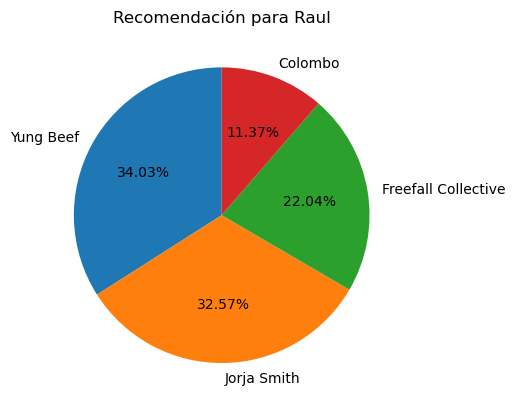

In [ ]:
recommended.plot(kind="pie",title="Recommendation for "+user,autopct = "%0.2f%%",startangle = 90)
plt.ylabel('')
plt.show()